# Exploratory Data Analysis on NEXRAD - KDIX & KOKX
This notebook makes use of the integrated nexrad scans that were cleaned using the bioRad R package. 
Baseline trends across the years 2017 to 2020 are explored here.

In [1]:
import sys
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sys.path.append('../')
from envir import config

/home/cusp/yg833/.conda/envs/birdsVE3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# read in files
files = ['KOKX2016night.csv', 'KOKX2017night.csv',
         'KOKX2018night.csv', 'KOKX2019night.csv', 'KOKX_spring_2020.csv']
kokx = pd.DataFrame()
for f in files:
    temp = pd.read_csv(config.dataFol+'clean_nexrad/'+f)
    kokx = kokx.append(temp)

In [3]:
kokx['datetime'] = pd.to_datetime(kokx.datetime).dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
kokx['year'] = pd.DatetimeIndex(kokx['datetime']).year
kokx['month'] = pd.DatetimeIndex(kokx['datetime']).month
kokx['day'] = pd.DatetimeIndex(kokx['datetime']).day
kokx['hour'] = pd.DatetimeIndex(kokx['datetime']).hour
kokx['minute'] = pd.DatetimeIndex(kokx['datetime']).minute
kokx['date'] = pd.to_datetime(kokx.year*10000+kokx.month*100+kokx.day,format='%Y%m%d')
kokx['radar'] = 'KOKX'
kokx.shape

(132766, 23)

In [4]:
kokx.groupby('year').count()

,datetime,mtr,vid,vir,rtr,mt,rt,ff,dd,u,...,airspeed,heading,airspeed_u,airspeed_v,month,day,hour,minute,date,radar
year,,,,,,,,,,,,,,,,,,,,,
2015,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
2016,32314,32314,32314,32314,32314,32314,32314,32314,32314,32314,...,32314,32314,32314,32314,32314,32314,32314,32314,32314,32314
2017,31816,31816,31816,31816,31816,31816,31816,31816,31816,31816,...,31816,31816,31816,31816,31816,31816,31816,31816,31816,31816
2018,33869,33869,33869,33869,33869,33869,33869,33869,33869,33869,...,33869,33869,33869,33869,33869,33869,33869,33869,33869,33869
2019,21721,21721,21721,21721,21721,21721,21721,21721,21721,21721,...,21721,21721,21721,21721,21721,21721,21721,21721,21721,21721
2020,13016,13016,13016,13016,13016,13016,13016,10261,10261,10261,...,0,0,0,0,13016,13016,13016,13016,13016,13016


In [5]:
kokx[kokx.year > 2016].groupby('year').count().mean()

datetime      25105.50
mtr           25105.50
vid           25105.50
vir           25105.50
rtr           25105.50
mt            25105.50
rt            25105.50
ff            24416.75
dd            24416.75
u             24416.75
v             24416.75
height        24416.75
airspeed      21851.50
heading       21851.50
airspeed_u    21851.50
airspeed_v    21851.50
month         25105.50
day           25105.50
hour          25105.50
minute        25105.50
date          25105.50
radar         25105.50
dtype: float64

In [6]:
# read in files
files = ['KDIX2016night.csv', 'KDIX2017night.csv',
         'KDIX2018night.csv', 'KDIX2019night.csv', 'KDIX_spring_2020.csv']
kdix = pd.DataFrame()
for f in files:
    temp = pd.read_csv(config.dataFol+'clean_nexrad/'+f)
    kdix = kdix.append(temp)

In [7]:
kdix['datetime'] = pd.to_datetime(kdix.datetime).dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
kdix['year'] = pd.DatetimeIndex(kdix['datetime']).year
kdix['month'] = pd.DatetimeIndex(kdix['datetime']).month
kdix['day'] = pd.DatetimeIndex(kdix['datetime']).day
kdix['hour'] = pd.DatetimeIndex(kdix['datetime']).hour
kdix['minute'] = pd.DatetimeIndex(kdix['datetime']).minute
kdix['date'] = pd.to_datetime(kdix.year*10000+kdix.month*100+kdix.day,format='%Y%m%d')
kdix['radar'] = 'KDIX'
kdix.shape

(151948, 23)

In [8]:
kdix[kdix.year > 2016].groupby('year').count().mean()

datetime      29363.75
mtr           29363.75
vid           29363.75
vir           29363.75
rtr           29363.75
mt            29363.75
rt            29363.75
ff            28765.00
dd            28765.00
u             28765.00
v             28765.00
height        28765.00
airspeed      25415.75
heading       25415.75
airspeed_u    25415.75
airspeed_v    25415.75
month         29363.75
day           29363.75
hour          29363.75
minute        29363.75
date          29363.75
radar         29363.75
dtype: float64

In [9]:
radars = pd.concat([kokx, kdix], axis=0)

In [10]:
radars.describe()

,mtr,vid,vir,rtr,mt,rt,ff,dd,u,v,height,airspeed,heading,airspeed_u,airspeed_v,year,month,day,hour,minute
count,284714.000000,284714.000000,284714.000000,284714.000000,2.847140e+05,2.847140e+05,279564.000000,279564.000000,279564.000000,279564.000000,279564.000000,255906.000000,255906.000000,255906.000000,255906.000000,284714.000000,284714.000000,284714.000000,284714.000000,284714.000000
mean,338.524006,8.737675,96.982669,3723.764068,6.754038e+05,7.429442e+06,9.071834,98.088943,2.644323,0.379405,462.481362,4.853381,97.802066,-0.546843,0.056639,2017.654822,6.010832,15.656216,10.847127,29.497471
std,1315.545730,29.582419,326.530455,14471.003035,7.389542e+05,8.128496e+06,4.603279,86.926763,6.511096,6.741371,284.074766,3.446588,84.780286,3.944468,3.866604,1.277124,3.421226,8.794096,8.970274,17.307351
min,0.000000,0.000000,0.000000,0.000000,1.040482e-01,1.144530e+00,0.000000,-89.997213,-74.170111,-77.885743,100.000000,0.000000,-87.959793,-80.282278,-74.893681,2015.000000,1.000000,1.000000,0.000000,0.000000
25%,8.300906,0.274781,3.274120,91.309962,6.709086e+04,7.379994e+05,6.056263,38.851777,-1.904441,-4.250382,255.100062,2.741888,29.332583,-2.466618,-2.054950,2017.000000,3.000000,8.000000,3.000000,15.000000
50%,33.173361,1.201649,13.830566,364.906973,4.452049e+05,4.897254e+06,8.308825,88.144505,3.088341,0.122991,393.188726,4.017224,95.137213,-0.447147,-0.036781,2018.000000,5.000000,16.000000,6.000000,30.000000
75%,126.636194,4.619018,51.853128,1392.998137,9.971112e+05,1.096822e+07,11.121360,167.275938,7.082592,4.759877,604.214934,6.101891,169.712780,1.499072,1.905703,2019.000000,9.000000,23.000000,20.000000,44.000000
max,39141.509595,698.591324,7684.504560,430556.605550,2.812864e+06,3.094151e+07,85.607595,269.998606,75.864589,83.083329,4703.493636,87.609759,268.459096,67.424280,85.754852,2020.000000,12.000000,31.000000,23.000000,59.000000


In [11]:
# scans per year
radars.groupby(['radar','year']).count()['mtr']

radar  year
KDIX   2015       30
       2016    34463
       2017    36975
       2018    39777
       2019    24911
       2020    15792
KOKX   2015       30
       2016    32314
       2017    31816
       2018    33869
       2019    21721
       2020    13016
Name: mtr, dtype: int64

In [12]:
radars['dayofyear'] = radars['date'].dt.dayofyear

In [13]:
by_day = radars.groupby(['radar','date']).mean()
by_day.reset_index(inplace=True)

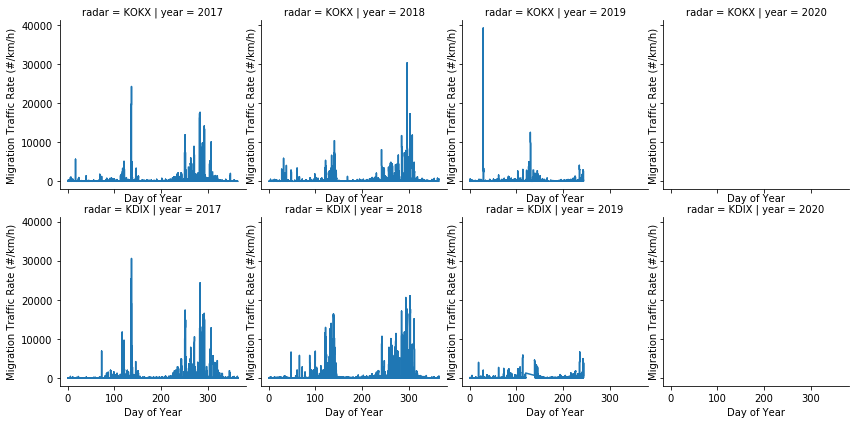

In [33]:
g = sns.FacetGrid(radars[radars.year > 2016], col="year", row='radar')
g = g.map_dataframe(plt.plot, "dayofyear", "mtr")
g.set(xlabel='Day of Year', ylabel='Migration Traffic Rate (#/km/h)')

In [15]:
by_month = radars[radars.year > 2016].groupby(['radar','year', 'month']).mean().reset_index()
by_month.pivot_table(index='month', columns=['year', 'radar'],values=['mtr'])

mtr                                                     \
year          2017                     2018                      2019   
radar         KDIX        KOKX         KDIX         KOKX         KDIX   
month                                                                   
1        12.016371   37.828862    12.039520    23.781025    15.796614   
2        12.602778   13.364847    45.305231    74.446045    20.826424   
3        81.893761   49.360951   135.093626    68.823786   173.008374   
4       436.661829  191.583299   417.558807    93.389785   259.715955   
5       837.127695  909.692661  1733.205020   878.279645   724.657174   
6        79.096470   73.042131    81.171498    45.049646    69.443457   
7        62.694718   69.103461    59.465913    63.693687    95.704368   
8       333.810365  281.161122   398.039718   276.093382   447.155335   
9      1379.727006  888.720280  1118.210550   574.535028  2482.663036   
10     1133.842293  918.302401  1817.745405  1484.595153          NaN   
11      565.608118  358.811059   553.328853   319.261203          NaN   
12       25.084021   28.266294    23.792311    35.401243          NaN   

                                            
year                      2020              
radar         KOKX        KDIX        KOKX  
month                                       
1       219.113913         NaN         NaN  
2        30.253074    3.457501    2.088702  
3        94.230947   80.833183   40.381957  
4       125.182344  270.193313   67.292356  
5       527.277933  718.914479  487.357768  
6        42.506210         NaN         NaN  
7        64.234103         NaN         NaN  
8       278.004114         NaN         NaN  
9      1077.297580         NaN         NaN  
10             NaN         NaN         NaN  
11             NaN         NaN         NaN  
12             NaN         NaN         NaN

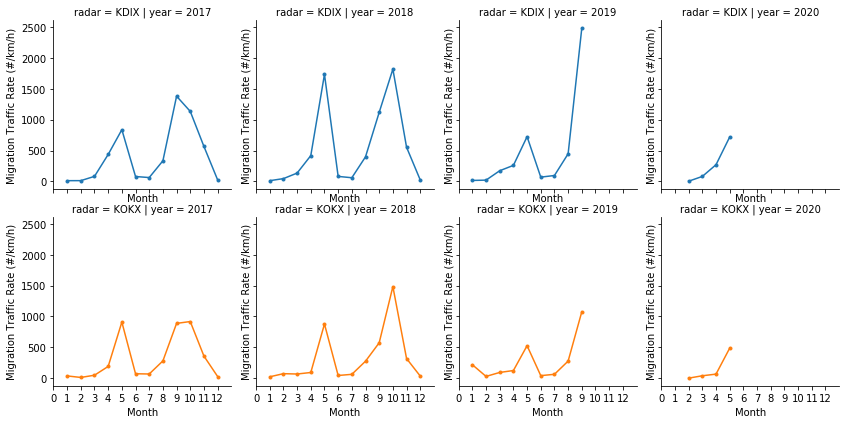

In [35]:
# annual patterns of mtr
g = sns.FacetGrid(by_month[by_month.year > 2016], col="year", row="radar", hue = "radar")
g = (g.map(plt.plot, "month", "mtr", marker=".")
     .set(xlim=(0, 13), xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]))
g.set(xlabel='Month', ylabel='Migration Traffic Rate (#/km/h)')
g.savefig('../figures/nexrad_mtr_by_month_20172020.png')

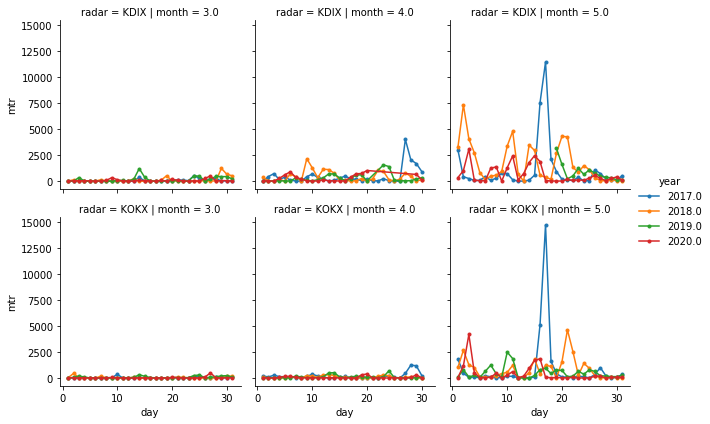

In [17]:
# annual patterns of mtr in March - June
g = sns.FacetGrid(by_day[(by_day['month']>=3) & (by_day['month']<6) & (by_day['year']>2016)],
                  hue="year", row="radar", col="month")
g = (g.map(plt.plot, "day", "mtr", marker=".").add_legend())

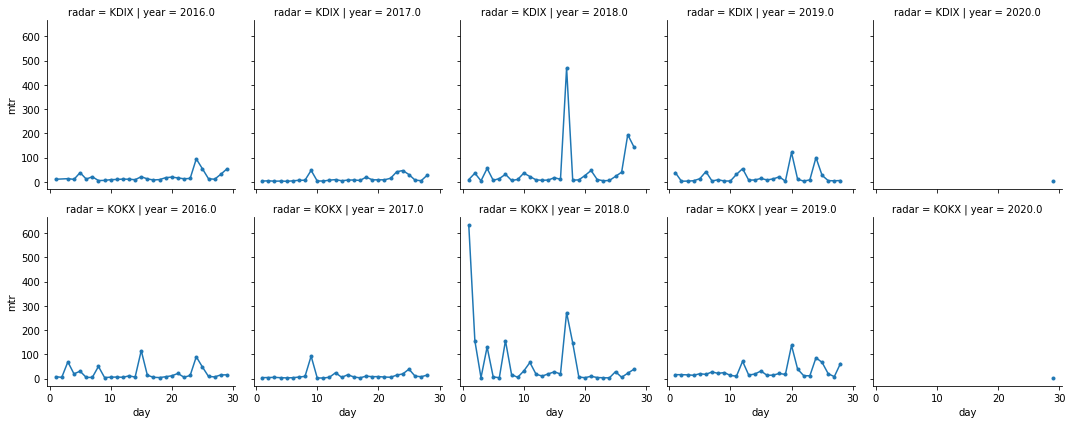

In [18]:
# annual patterns of mtr in March
g = sns.FacetGrid(by_day[by_day['month']==2], col="year", row = "radar")
g = g.map(plt.plot, "day", "mtr", marker=".")

##### Potential Peaks
- 2/25/2016
- 2/9/2017
- 2/18/2018, 2/28/2018
- 2/21/2019, 2/24/2019

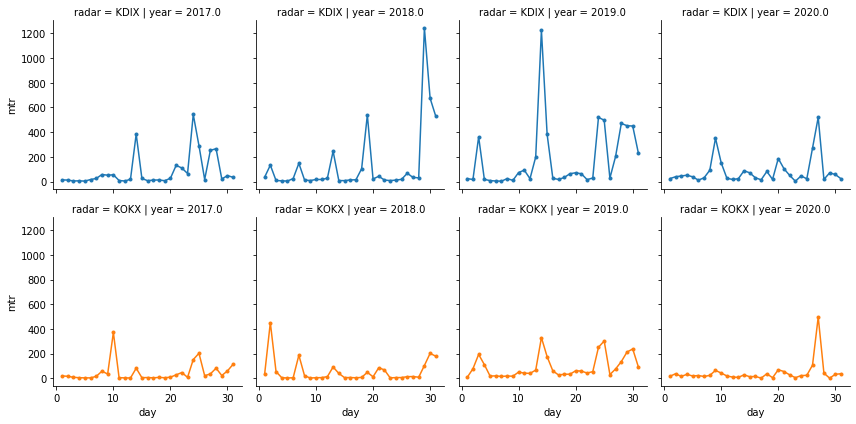

In [19]:
# annual patterns of mtr in March
g = sns.FacetGrid(by_day[(by_day['month']==3) & (by_day['year']>2016)],
                  col="year", row = "radar", hue="radar")
g = g.map(plt.plot, "day", "mtr", marker=".")

##### Potential Peaks
- 3/17/2016, 3/23/2016
- 3/14/2017, 3/25/2017, 3/28/2017
- 3/2/2018, 3/6/2018, 3/13/2018, 3/19/2018, 3/30/2018
- 3/4/2019, 3/15/2019, 3/25/2019,3/29/2019

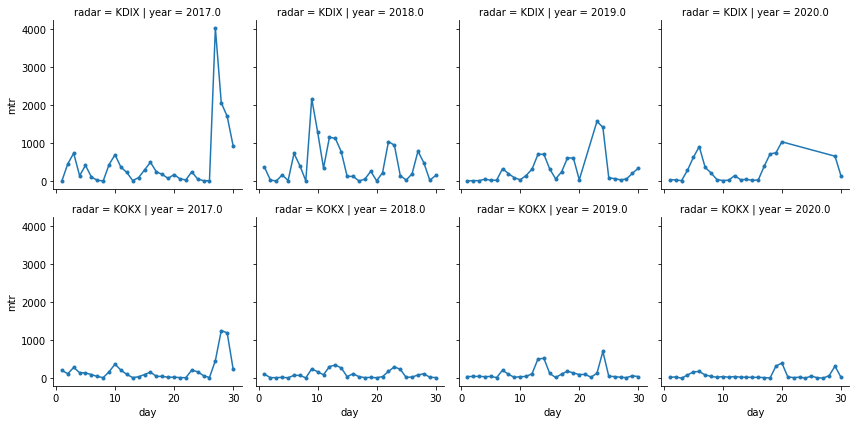

In [20]:
# annual patterns of mtr in April
g = sns.FacetGrid(by_day[(by_day['month']==4) & (by_day['year']>2016)], col="year", row="radar")
g = g.map(plt.plot, "day", "mtr", marker=".")

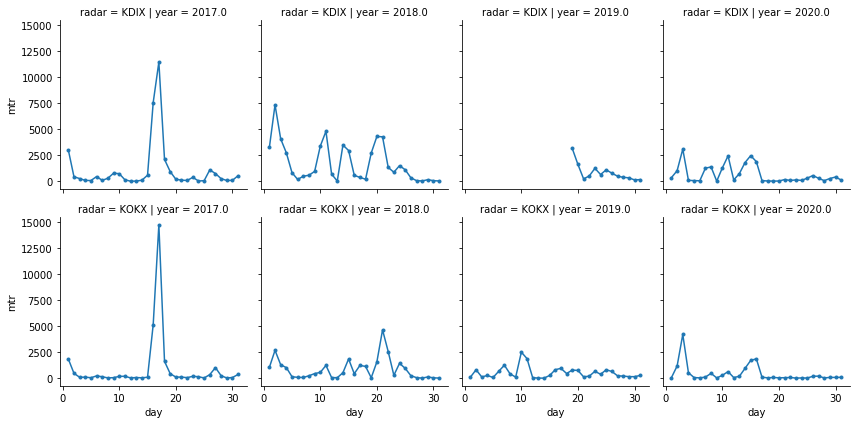

In [21]:
# annual patterns of mtr in May
g = sns.FacetGrid(by_day[(by_day['month']==5) & (by_day['year']>2016)], col="year", row="radar")
g = g.map(plt.plot, "day", "mtr", marker=".")

### Deeper Look at By Hour By Height

#### Peaks in the month of May
Since the above line plots seem to demonstrate peaks in May for each year. Let's sample a couple of dates to look at both the mtr and the height metric for exploration.
##### Dates to Examine:
* May 17, 2017
* May 22, 2018
* May 20, 2019

In [22]:
may_peaks = ['2017-03-25', '2018-03-29', '2019-03-14']
by_day[by_day.date.isin(may_peaks)]

,radar,date,mtr,vid,vir,rtr,mt,rt,ff,dd,...,airspeed,heading,airspeed_u,airspeed_v,year,month,day,hour,minute,dayofyear
449,KDIX,2017-03-25,290.422058,4.349327,47.842595,3194.642641,57106.432234,6.281708e+05,13.054268,45.497814,...,8.007031,-0.843867,-0.324231,7.104770,2017.0,3.0,25.0,13.019231,30.105769,84.0
818,KDIX,2018-03-29,1242.421062,14.395813,158.353942,13666.631683,118485.189539,1.303337e+06,11.314371,46.690477,...,4.878305,66.845556,2.992470,2.727348,2018.0,3.0,29.0,8.347826,29.304348,88.0
1167,KDIX,2019-03-14,1224.239251,17.555434,193.109769,13466.631765,61026.418355,6.712906e+05,20.097007,28.564122,...,9.553276,29.994928,3.312769,7.719546,2019.0,3.0,14.0,10.519608,29.480392,73.0
1853,KOKX,2017-03-25,203.116122,3.072513,33.797647,2234.277337,67571.996747,7.432920e+05,12.710171,130.496798,...,6.413976,66.857514,2.891673,1.941672,2017.0,3.0,25.0,11.810526,30.294737,84.0
2220,KOKX,2018-03-29,104.065269,1.671590,18.387487,1144.717964,86461.511632,9.510766e+05,12.539763,38.061051,...,6.721063,60.875059,5.308996,2.868199,2018.0,3.0,29.0,10.577465,28.577465,88.0
2569,KOKX,2019-03-14,330.051677,5.359899,58.958887,3630.568448,169000.562903,1.859006e+06,17.206985,44.115831,...,7.905667,61.017572,6.239839,2.892597,2019.0,3.0,14.0,9.784091,28.250000,73.0


In [23]:
radars[radars.date.isin(may_peaks)].groupby('date').count()

,datetime,mtr,vid,vir,rtr,mt,rt,ff,dd,u,...,heading,airspeed_u,airspeed_v,year,month,day,hour,minute,radar,dayofyear
date,,,,,,,,,,,,,,,,,,,,,
2017-03-25,199,199,199,199,199,199,199,199,199,199,...,199,199,199,199,199,199,199,199,199,199
2018-03-29,163,163,163,163,163,163,163,163,163,163,...,163,163,163,163,163,163,163,163,163,163
2019-03-14,190,190,190,190,190,190,190,190,190,190,...,190,190,190,190,190,190,190,190,190,190


In [24]:
radars.datetime.diff().mean()

Timedelta('0 days 00:08:09.485243')

In [25]:
radars['utc_datetime'] = radars.datetime.dt.tz_convert('UTC')
radars['utc_hour'] = pd.DatetimeIndex(radars['utc_datetime']).hour

2017-03-25
Average time in minutes between scans
0 days 00:05:24
2018-03-29
Average time in minutes between scans
0 days 00:09:48
2019-03-14
Average time in minutes between scans
0 days 00:07:12


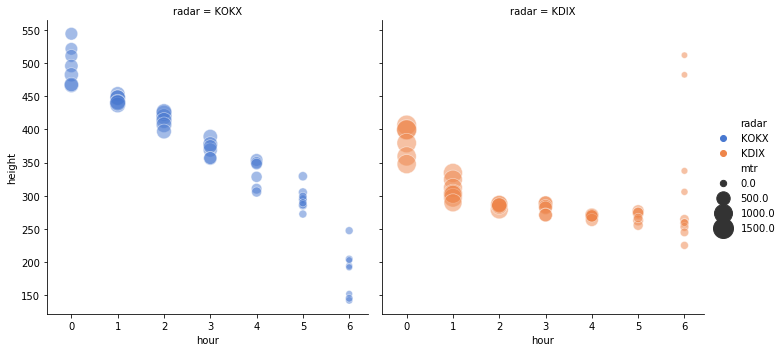

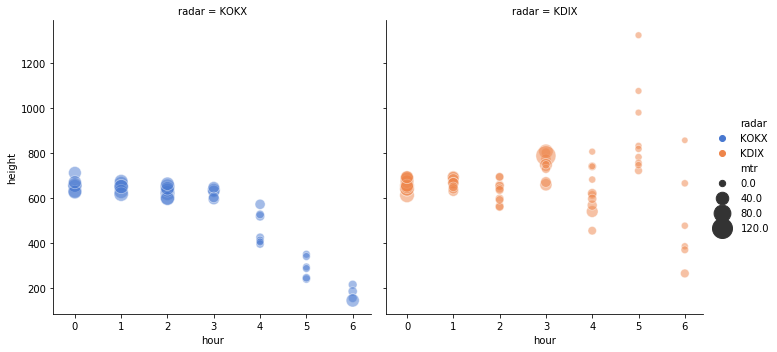

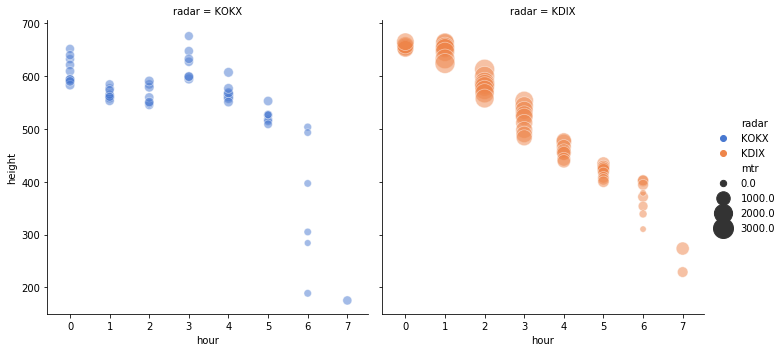

In [26]:
for i in may_peaks:
    print(i)
    print("Average time in minutes between scans")
    print(radars[radars.date.isin([i])].datetime.diff().median())
    sns.relplot(x='hour', y="height", size="mtr", hue = "radar", col="radar",
                sizes=(40, 400), alpha=.5, palette="muted",
                height=5, data=radars[(radars.date.isin([i])) & (radars.hour < 10)])

In [27]:
radar_hour = radars[radars.year > 2016].groupby(['radar', 'hour', 'month']).mean().reset_index()

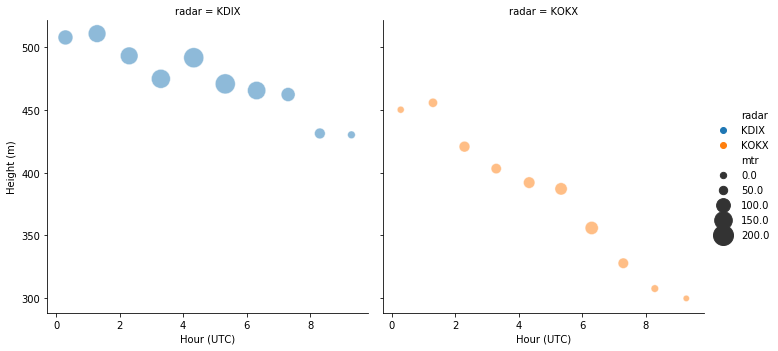

In [37]:
g = sns.relplot(x='utc_hour', y="height", size="mtr", col="radar", hue = "radar",
            sizes=(40, 400), alpha=.5, 
            height=5, data=radar_hour[(radar_hour.utc_hour < 10) & (radar_hour.month ==3)])
g.set(xlabel='Hour (UTC)', ylabel='Height (m)')
g.savefig('../figures/nexrad_height_by_hour_20172020.png')